In [1]:
import pandas as pd
import ast
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Comparison of Graph Metrics for Different Prominent Personalities


In [4]:
def make_graph(file_name):
    path = "dataset_module_2/" + file_name
    data = pd.read_csv(path) 
    counter=len(data)
    nodes={}
    for i in range(counter):
        nodes[i]=data['username'][i]
    #print(nodes)
    mentions={}
    j=counter

    k=counter
    for i in range(counter):
        res = ast.literal_eval(data['mentions'][i])
        for j in range(len(res)):
            if(len(res[j])>0):
                nodes[k]=res[j]
                k+=1
    unique_users=set(nodes.values())
    user_ind={}
    j=0
    for i in unique_users:
        user_ind[i]=j
        j+=1
    #user_ind  

    ind_to_user={}
    for key in user_ind:
        ind_to_user[user_ind[key]]=key

    arr=np.zeros([len(unique_users),len(unique_users)],dtype=int)
    for i in range(counter):
        user=data['username'][i]
        res = ast.literal_eval(data['mentions'][i])
        for j in res:
            #print(user,"men",j)
            arr[user_ind[user]][[user_ind[j]]]+=1
    val =0
    for i in range (len(unique_users)):
        for j in range (len(unique_users)):
            val = max(val,arr[i][j])

    Graph=nx.Graph()
    DiGraph = nx.DiGraph();
    for i in range(0,len(unique_users)):
        for j in range(0,len(unique_users)):
            if(arr[i][j]>0):
                #print(i,j,arr[i][j])
                Graph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
                DiGraph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
            else:
                if(Graph.has_node(i)==0):
                    Graph.add_node(ind_to_user[i])
                if(Graph.has_node(j)==0):
                    Graph.add_node(ind_to_user[j])


    #nx.spring_layout(Graph)
    plt.figure(figsize=(50,50))
    nx.draw_networkx(Graph,node_size=300, node_color='blue', with_labels=True)
    #return Graph

In [5]:
def make_digraph(file_name):
    path = "dataset_module_2/" + file_name
    data = pd.read_csv(path) 
    counter=len(data)
    nodes={}
    for i in range(counter):
        nodes[i]=data['username'][i]
    #print(nodes)
    mentions={}
    j=counter

    k=counter
    for i in range(counter):
        res = ast.literal_eval(data['mentions'][i])
        for j in range(len(res)):
            if(len(res[j])>0):
                nodes[k]=res[j]
                k+=1
    unique_users=set(nodes.values())
    user_ind={}
    j=0
    for i in unique_users:
        user_ind[i]=j
        j+=1
    #user_ind  

    ind_to_user={}
    for key in user_ind:
        ind_to_user[user_ind[key]]=key

    arr=np.zeros([len(unique_users),len(unique_users)],dtype=int)
    for i in range(counter):
        user=data['username'][i]
        res = ast.literal_eval(data['mentions'][i])
        for j in res:
            #print(user,"men",j)
            arr[user_ind[user]][[user_ind[j]]]+=1
    val =0
    for i in range (len(unique_users)):
        for j in range (len(unique_users)):
            val = max(val,arr[i][j])

    Graph=nx.Graph()
    DiGraph = nx.DiGraph();
    for i in range(0,len(unique_users)):
        for j in range(0,len(unique_users)):
            if(arr[i][j]>0):
                #print(i,j,arr[i][j])
                Graph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
                DiGraph.add_edge(ind_to_user[i],ind_to_user[j],weight=arr[i][j])
#             else:
#                 if(Graph.has_node(i)==0):
#                     Graph.add_node(ind_to_user[i])
#                 if(Graph.has_node(j)==0):
#                     Graph.add_node(ind_to_user[j])


    #nx.spring_layout(Graph)
    plt.figure(figsize=(50,50))
    #
    return DiGraph

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

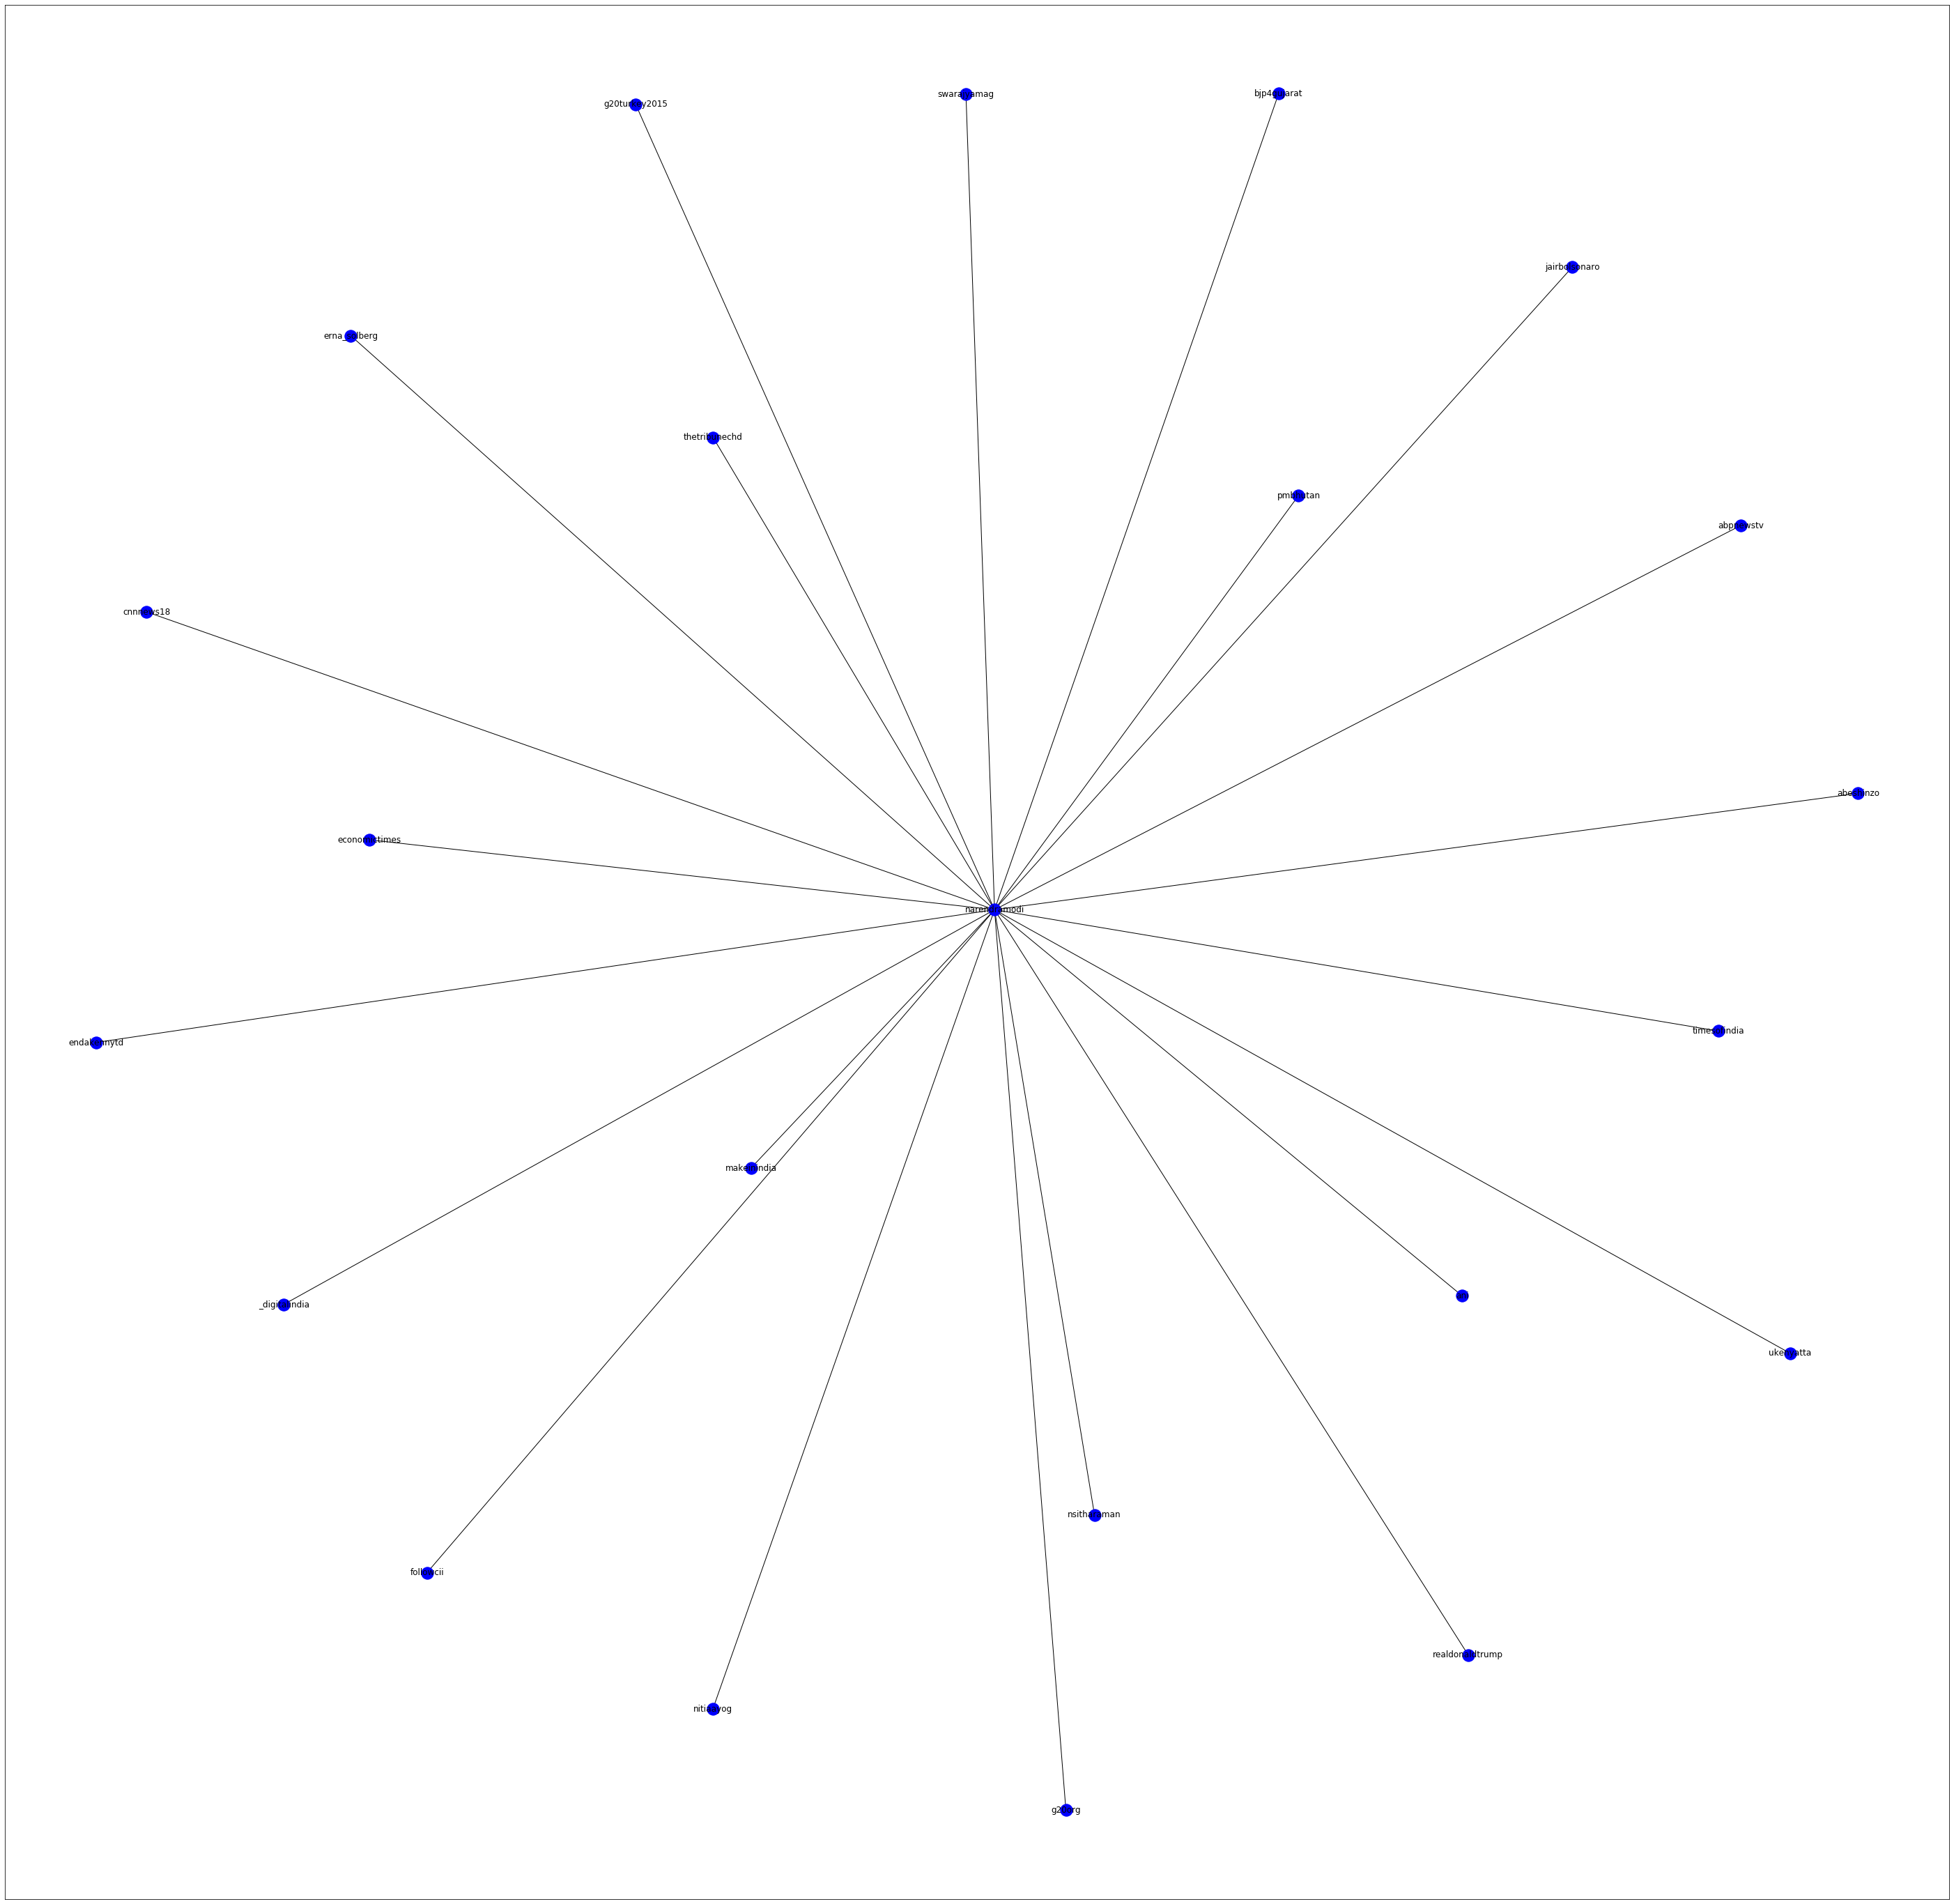

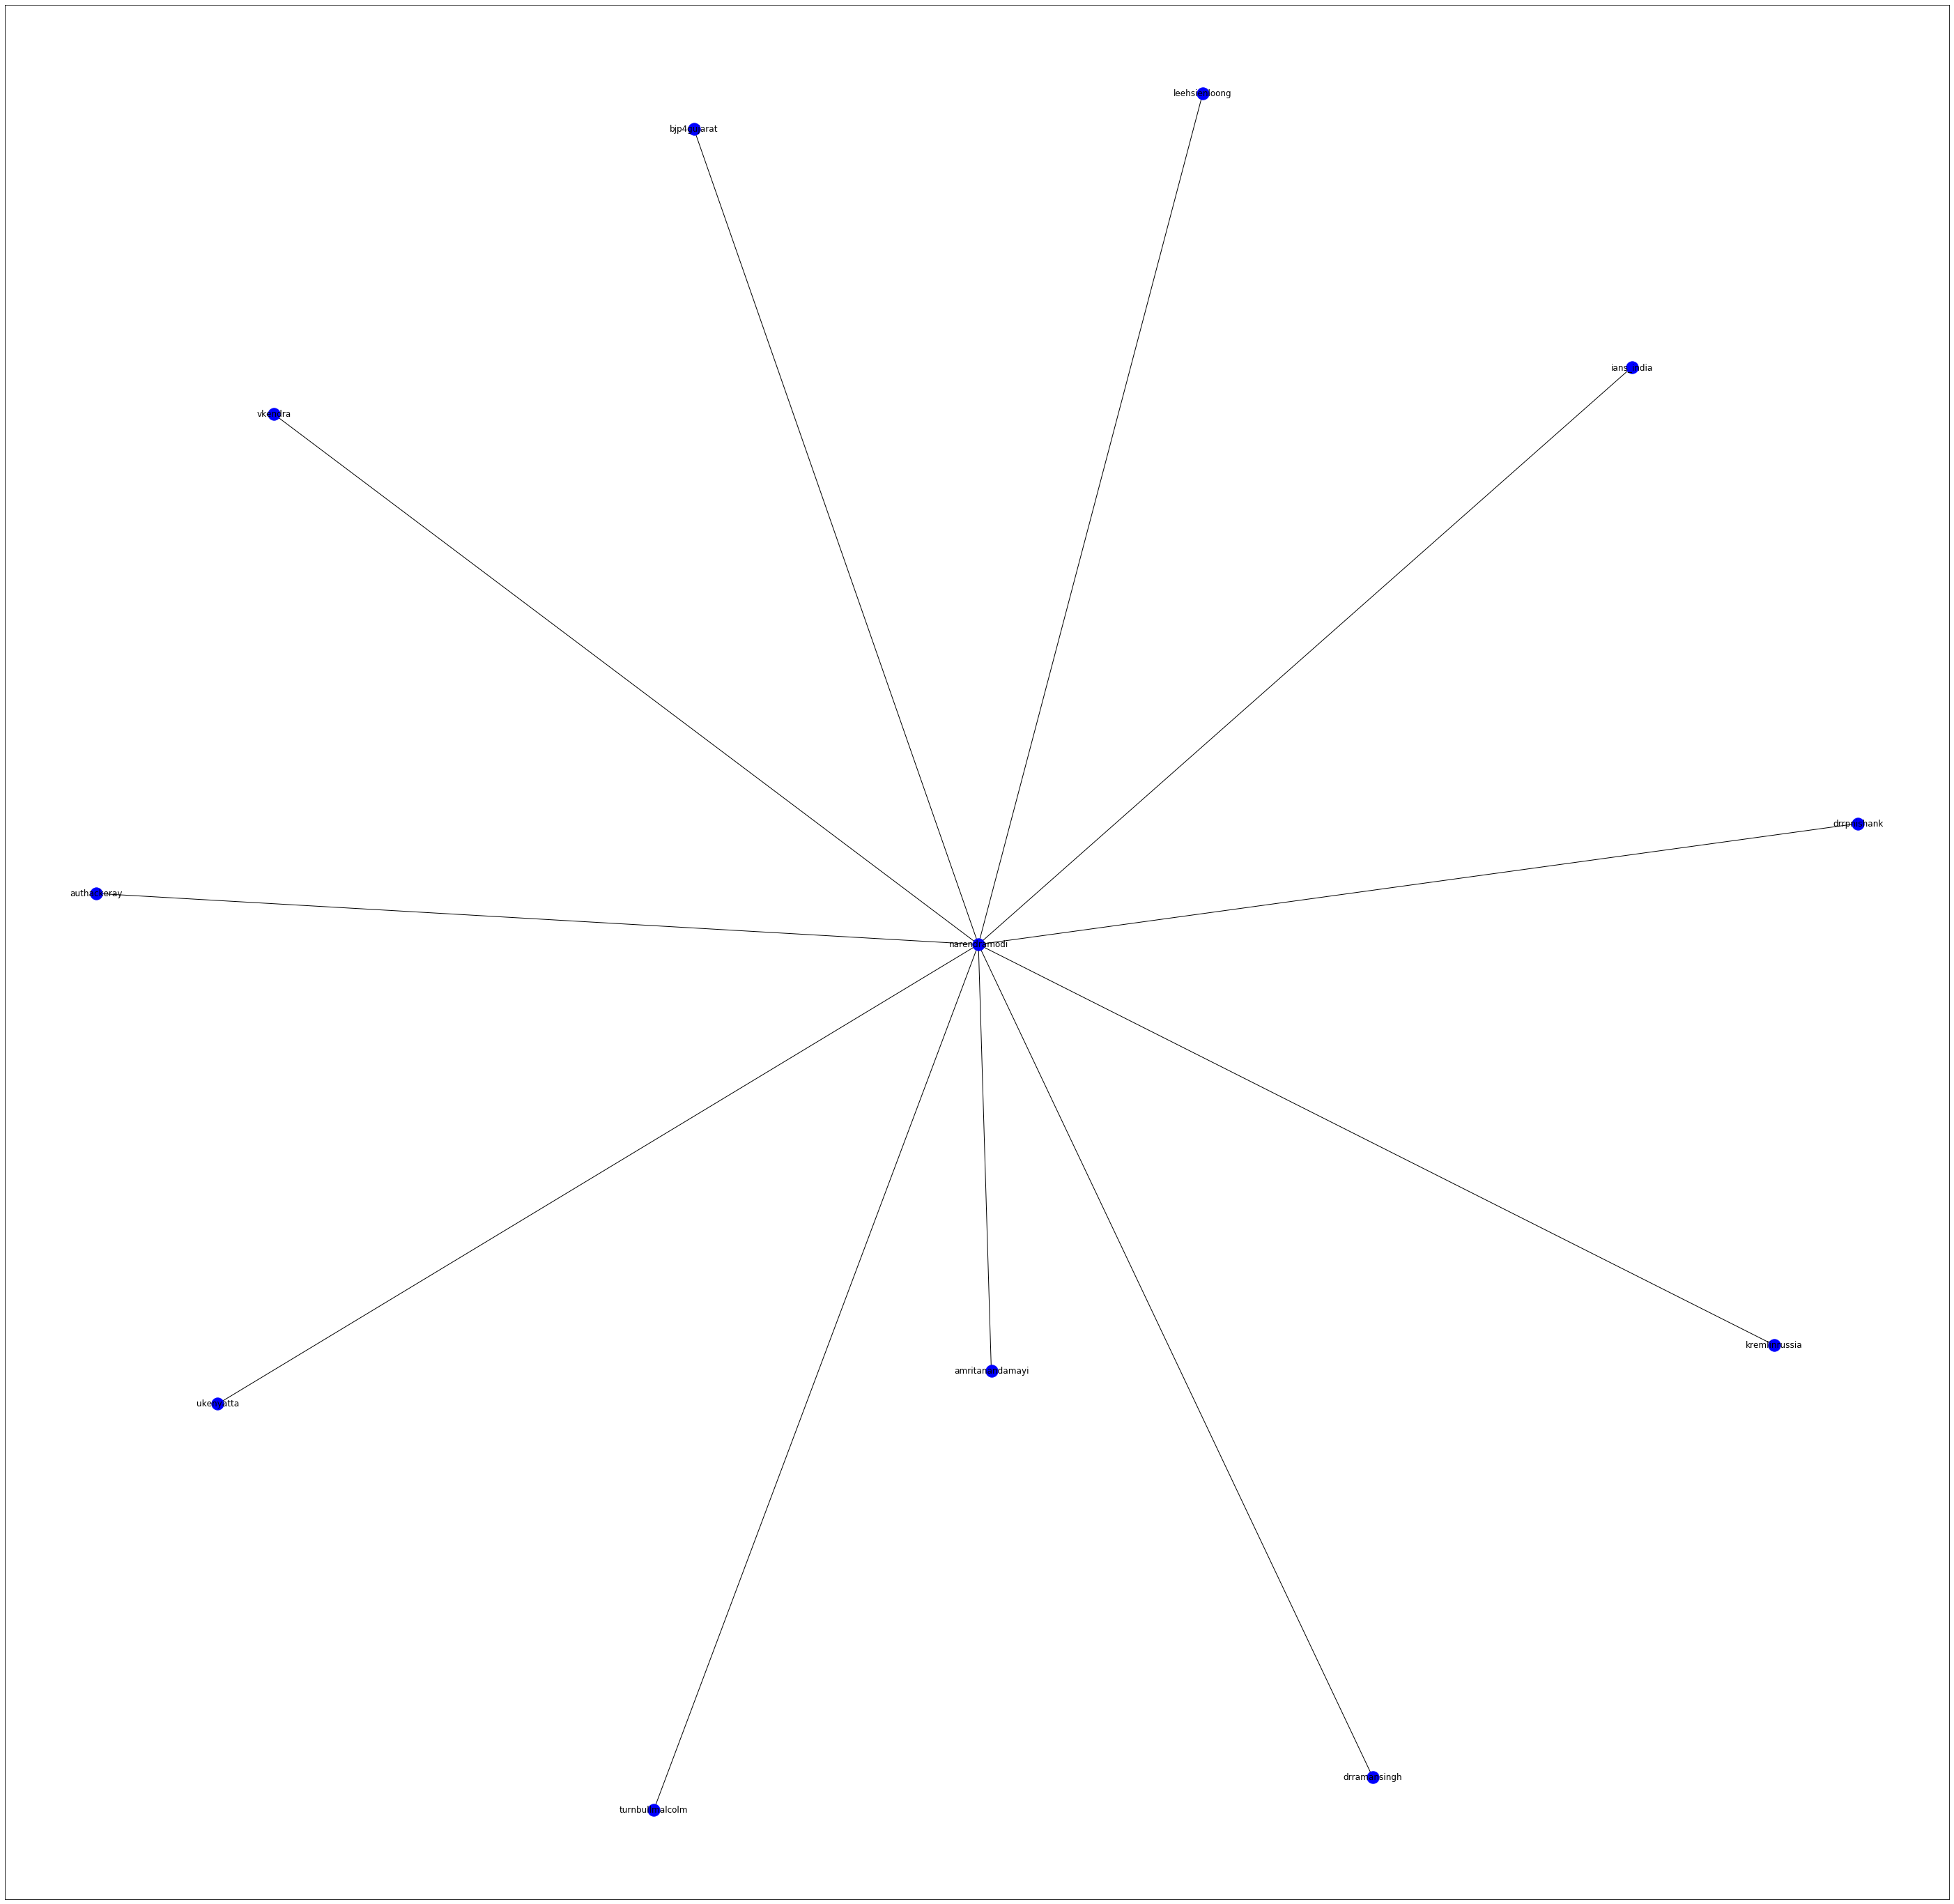

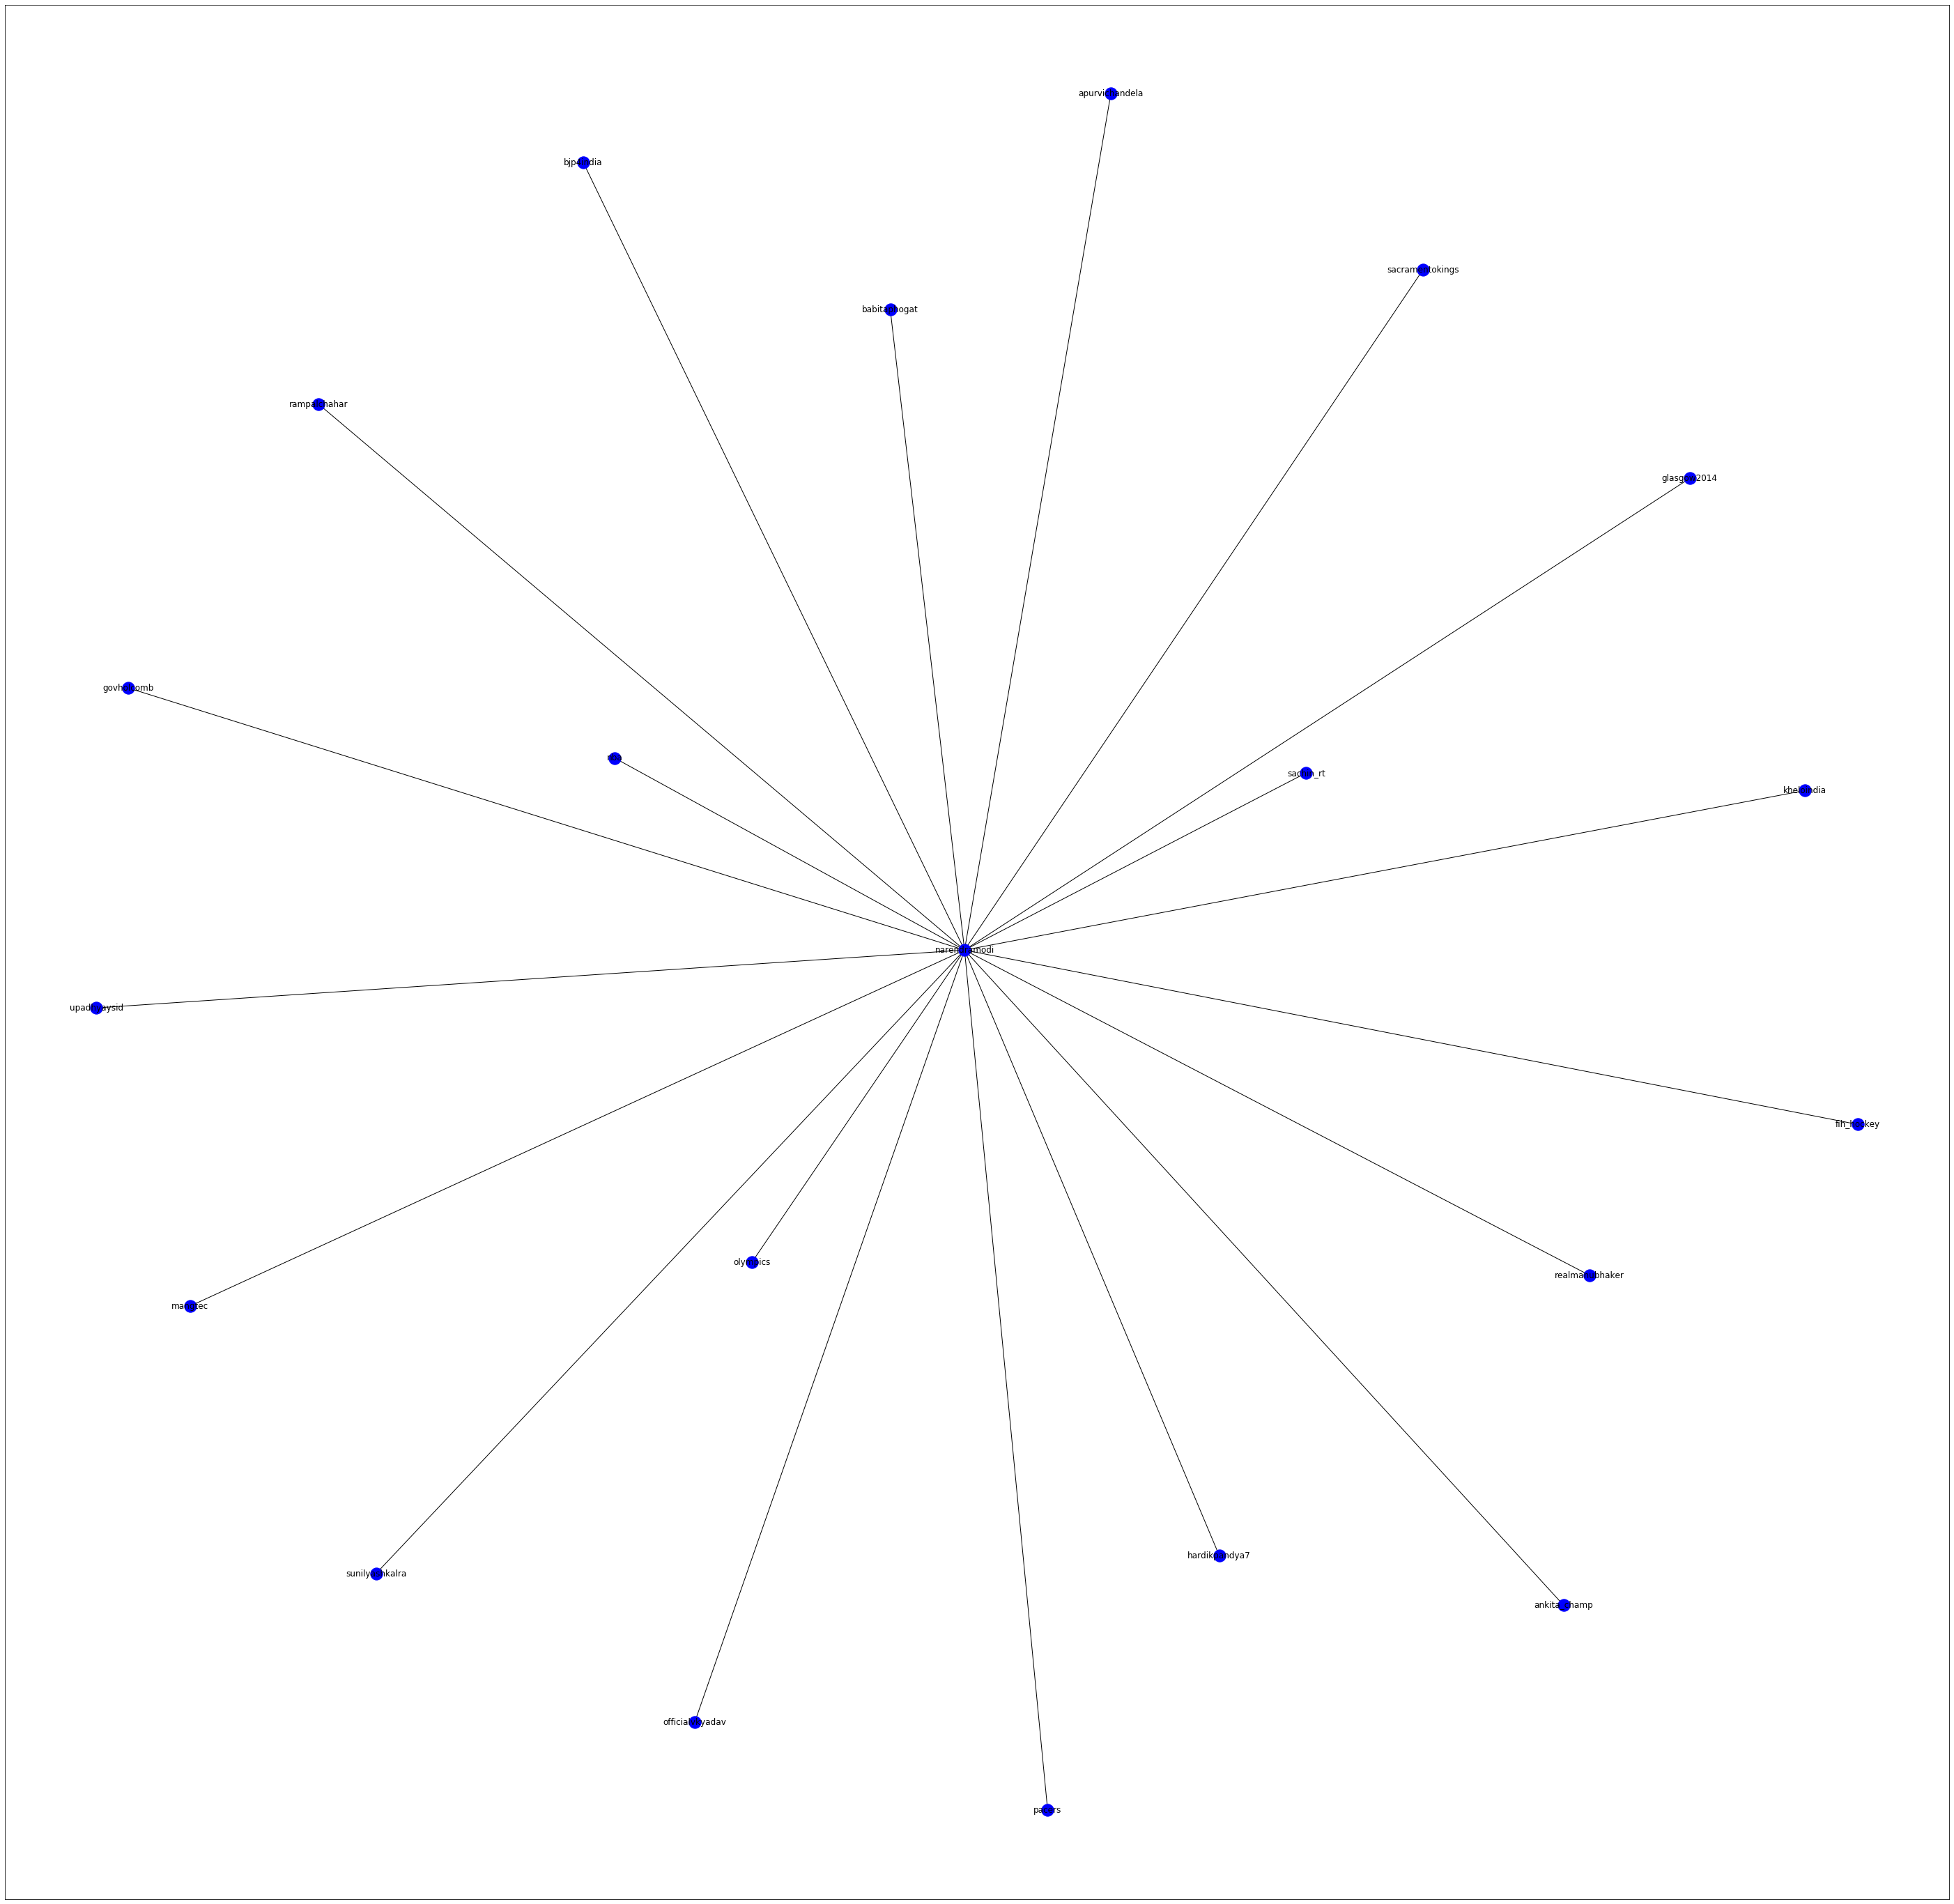

In [6]:
modi_eco=make_digraph("modi_economy.csv")
modi_edu=make_digraph("modi_education.csv")
modi_sprt=make_digraph("modi_sports.csv")
make_graph("modi_economy.csv")
make_graph("modi_education.csv")
make_graph("modi_sports.csv")

In [20]:
kejri_eco=make_digraph("kejriwal_economy.csv")
kejri_edu=make_digraph("kejriwal_education.csv")
kejri_sprt=make_digraph("kejriwal_sports.csv")

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

In [30]:
rahul_eco=make_digraph("rahulgandhi_economy.csv")
rahul_edu=make_digraph("rahulgandhi_education.csv")
rahul_sprt=make_digraph("rahulgandhi_sports.csv")

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

In [31]:
def stat(graph):
    stats=[]
    size=graph.size(weight="weight")
    size
    num_edges=graph.number_of_edges()
    num_edges
    max_ind=0.000
    max_out=0.000
    sum_in=0.000
    sum_out=0.000
    ind_by_out=0.000
    avg_in=0.00
    avg_out=0.00
    avg_ind_by_out=0.00
    for node in list(graph.nodes()):
        ind=graph.in_degree(node)
        out=graph.out_degree(node)
        sum_in+=ind
        sum_out+=out
        max_ind=max(max_ind,ind)
        max_out=max(max_out,out)
        if(out!=0):
            ind_by_out+=(ind/out)
    leng=len(list(graph.nodes()))
    if leng!=0:
        avg_ind_by_out=ind_by_out/leng
    if leng!=0:
        avg_in=sum_in/leng
        avg_out=sum_out/leng
    stats.append(size)
    stats.append(num_edges)
    stats.append(max_ind)
    stats.append(max_out)
    stats.append(avg_ind_by_out)
    return stats

# Tablewise comparison of graph metrics for Topics against our Prominent Personalities

In [32]:
#For Modi:-
sports_stats=stat(modi_sprt)
economy_stats=stat(modi_eco)
education_stats=stat(modi_edu)


def make_dict(dicti,i):
    dicti["Education"]=education_stats[i]
    dicti["Economy"]=economy_stats[i]
    dicti["sports"]=sports_stats[i]
    return dicti
size={}
size=make_dict(size,0)
edges={}
edges=make_dict(edges,1)
max_out_degree={}
max_out_degree=make_dict(max_out_degree,3)
max_in_degree={}
max_in_degree=make_dict(max_in_degree,2)
avg_in_out={}
avg_in_out=make_dict(avg_in_out,4)



In [33]:
table_values={
    "SIZE":size,
    "EDGES":edges,
    "MAXIMUM IN DEGREE":max_in_degree,
    "MAXIMUM OUT DEGREE":max_out_degree,
    "AVERAGE OUT DEGREE":avg_in_out,
}
table=pd.DataFrame(table_values)
table

,SIZE,EDGES,MAXIMUM IN DEGREE,MAXIMUM OUT DEGREE,AVERAGE OUT DEGREE
Education,12.0,11,1,11,0.0
Economy,23.0,22,1,22,0.0
sports,23.0,20,1,20,0.0


In [34]:
#For Kejriwal:-
sports_stats=stat(kejri_sprt)
economy_stats=stat(kejri_eco)
education_stats=stat(kejri_edu)


def make_dict(dicti,i):
    dicti["Education"]=education_stats[i]
    dicti["Economy"]=economy_stats[i]
    dicti["sports"]=sports_stats[i]
    return dicti
size={}
size=make_dict(size,0)
edges={}
edges=make_dict(edges,1)
max_out_degree={}
max_out_degree=make_dict(max_out_degree,3)
max_in_degree={}
max_in_degree=make_dict(max_in_degree,2)
avg_in_out={}
avg_in_out=make_dict(avg_in_out,4)



In [35]:
table_values={
    "SIZE":size,
    "EDGES":edges,
    "MAXIMUM IN DEGREE":max_in_degree,
    "MAXIMUM OUT DEGREE":max_out_degree,
    "AVERAGE OUT DEGREE":avg_in_out,
}
table=pd.DataFrame(table_values)
table

,SIZE,EDGES,MAXIMUM IN DEGREE,MAXIMUM OUT DEGREE,AVERAGE OUT DEGREE
Education,4.0,4,1.0,4.0,0.0
Economy,0.0,0,0.0,0.0,0.0
sports,1.0,1,1.0,1.0,0.0


In [39]:
#Rahul:-

sports_stats=stat(rahul_sprt)
economy_stats=stat(rahul_eco)
education_stats=stat(rahul_edu)


def make_dict(dicti,i):
    dicti["Education"]=education_stats[i]
    dicti["Economy"]=economy_stats[i]
    dicti["sports"]=sports_stats[i]
    return dicti
size={}
size=make_dict(size,0)
edges={}
edges=make_dict(edges,1)
max_out_degree={}
max_out_degree=make_dict(max_out_degree,3)
max_in_degree={}
max_in_degree=make_dict(max_in_degree,2)
avg_in_out={}
avg_in_out=make_dict(avg_in_out,4)



In [40]:
table_values={
    "SIZE":size,
    "EDGES":edges,
    "MAXIMUM IN DEGREE":max_in_degree,
    "MAXIMUM OUT DEGREE":max_out_degree,
    "AVERAGE OUT DEGREE":avg_in_out,
}
table=pd.DataFrame(table_values)
table

,SIZE,EDGES,MAXIMUM IN DEGREE,MAXIMUM OUT DEGREE,AVERAGE OUT DEGREE
Education,0.0,0,0.0,0.0,0.0
Economy,2.0,2,1.0,2.0,0.0
sports,1.0,1,1.0,1.0,0.0
